In [1]:
import pandas as pd
import numpy as np




In [2]:
data = pd.read_csv('loan.csv' ,low_memory=False)

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## DATA CLEANING

In [5]:
data.isnull().sum()/len(data.index)*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

## Removing columns with 60% or more missing values 



In [6]:
len(data.columns[data.isnull().sum()/len(data.index)*100 >= 60])

# 57 columns will be removed 


57

In [7]:
#removing columns 

data.drop( list(data.columns[data.isnull().sum()/len(data.index)*100 >= 60]), axis = 1 ,inplace=True)

In [8]:
data.isnull().sum()/len(data.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
# desc column can be removed as it has lot of missing values and does not add any value to our analysis 
data.drop( 'desc' , axis = 1,inplace = True   )

In [10]:
#emp_title has 6.19 % of missing values. removing rows where emp_title is missing 

data = data[data.emp_title.notnull()]

In [11]:
data.isnull().sum()/len(data.index)*100 

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.150303
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.024156
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [12]:
# Number of tax liens
data.tax_liens.groupby(data.tax_liens).count()

# the values are either 0.0 or null. so we can safely delete it as it wont be much helpfull in analysis 

tax_liens
0.0    37226
Name: tax_liens, dtype: int64

In [13]:
print(data.pub_rec_bankruptcies.groupby(data.pub_rec_bankruptcies).count())
print(data.chargeoff_within_12_mths.groupby(data.chargeoff_within_12_mths).count())
print(data.collections_12_mths_ex_med.groupby(data.collections_12_mths_ex_med).count())

# both columns collections_12_mths_ex_med ,chargeoff_within_12_mths have values 0.0 or null.
# so we can delete chargeoff_within_12_mths (number of charge-offs within 12 months) ,collections_12_mths_ex_med

pub_rec_bankruptcies
0.0    35090
1.0     1507
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
chargeoff_within_12_mths
0.0    37211
Name: chargeoff_within_12_mths, dtype: int64
collections_12_mths_ex_med
0.0    37211
Name: collections_12_mths_ex_med, dtype: int64


In [14]:
data.drop(['tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths'] , axis=1 , inplace = True)

In [15]:
data.isnull().sum()/len(data.index)*100 

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  0.000000
emp_length                 0.150303
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
url                        0.000000
purpose                    0.000000
title                      0.024156
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0

### Removing rows where there are nulls from below column 
#### pub_rec_bankruptcies - 1.75 % , last_pymnt_d - Last payment date - 0.17 % , title - 0.02% , revol_util - 0.12% ,  emp_length - 0.15%


In [16]:
data = data[data.pub_rec_bankruptcies.notnull()]
data = data[data.last_pymnt_d.notnull()]
data = data[data.emp_length.notnull()]

data = data[data.title.notnull()]
data = data[data.revol_util.notnull()]

In [17]:
data.isnull().sum()/len(data.index)*100 
# No null values

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_

# Removing columns which wont help in analysis

#### url - URL for the LC page with listing data.
#### zip_code - last two numbers from zip code are xx , not usefull for analysis ,we can use addr_state insted 



### There are columns with only one unique value like policy_code with value 1 representing its publicly available
#### application_type - INDIVIDUAL for all data 
#### acc_now_delinq - 0 for all data representing the number of accounts on which the borrower is now delinquent.
#### delinq_amnt - 0 (The past-due amount owed for the accounts on which the borrower is now delinquent.)
#### pymnt_plan - n for all values (Indicates if a payment plan has been put in place for the loan)
#### initial_list_status - only 1 unique value 'f' representing initial status of the loan 

In [18]:
data.nunique()

id                         36433
member_id                  36433
loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7474
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
pymnt_plan                     1
url                        36433
purpose                       14
title                      17954
zip_code                     806
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util

In [19]:
data.drop(['url','zip_code','policy_code','application_type' , 'acc_now_delinq' ,'delinq_amnt' ,'pymnt_plan' ,'initial_list_status']  ,axis = 1 , inplace = True)


#removing id and member_id as we dont need them in analysis
data.drop(['id','member_id'] , axis =1 , inplace = True)

In [20]:
data.emp_title.apply(lambda x:x.lower()).nunique()

#25899 unique - to many 

26859

## Fixing column formats 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 40 columns):
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
dti     

In [22]:
# term , int_rate can be converted to int and float repectively
data['int_rate'] = data.int_rate.str[0:-1].astype(float)


In [23]:
# converting terms from object to int and removing months 
data['term'] = data.term.str[0:3].astype(int)

In [24]:
# removing % and converting to float
data['revol_util'] = data.revol_util.str[:-1].astype(float)

In [25]:
# Removing rows with Current value in loan_status as as they are nither fully paid nor defaulted  
data = data.loc[data.loan_status != 'Current']

In [26]:
# changing values from charged off = 1 , Fully Paid = 0 to make our analysis easy 

data['loan_status'] = data["loan_status"].apply(lambda x:1 if x == 'Charged Off' else 0)


In [27]:
# rounding off continous variables 

data['funded_amnt_inv'] = data.funded_amnt_inv.apply(lambda x:round(x,2))
data['total_pymnt'] = data.funded_amnt_inv.apply(lambda x:round(x,2))
data['collection_recovery_fee'] = data.funded_amnt_inv.apply(lambda x:round(x,2))

#data['int_rate'] = data.int_rate.apply(lambda x:round(x,2))

In [28]:
#to see all columns 

pd.set_option('display.max_columns', 50)


In [29]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,2500.0,1008.71,456.46,435.17,0.00,117.08,2500.0,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,10000.0,12231.89,10000.00,2214.92,16.97,0.00,10000.0,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0,0.0,5000.0,5632.21,5000.00,632.21,0.00,0.00,5000.0,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,0,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.0,0.0,7000.0,10110.84,6985.61,3125.23,0.00,0.00,7000.0,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,0,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.5,4,0.0,0.0,3000.0,3939.14,3000.00,939.14,0.00,0.00,3000.0,Jan-15,111.34,Dec-14,0.0


### removing customer behaviour variables as are not available at the time of loan application, and thus they cannot be used as predictors for credit approval

#### out_prncp  -  Remaining outstanding principal for total amount funded
#### out_prncp_inv  - Remaining outstanding principal for portion of total amount funded by investors
#### total_pymnt_inv - Payments received to date for portion of total amount funded by investors
#### total_rec_prncp - Principal received to date
#### total_rec_int - Interest received to date
#### total_rec_late_fee - Late fees received to date
#### recoveries - post charge off gross recovery
#### collection_recovery_fee - post charge off collection fee
#### last_pymnt_d - Last month payment was received


In [30]:
data.drop(['out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt'] , axis =1 )

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.00,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,1,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,2500.00,Sep-13,0.0
3,10000,10000,10000.00,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,0,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,10000.00,Apr-16,0.0
5,5000,5000,5000.00,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,5000.00,Jan-16,0.0
6,7000,7000,7000.00,60,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,0,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60,11,7000.00,May-16,0.0
7,3000,3000,3000.00,36,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,0,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50,4,3000.00,Dec-14,0.0
9,5375,5375,5350.00,60,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,1,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50,3,5350.00,Mar-13,0.0
10,6500,6500,6500.00,60,14.65,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.00,Not Verified,Dec-11,0,debt_consolidation,High intrest Consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.60,23,6500.00,Dec-15,0.0
11,12000,12000,12000.00,36,12.69,402.54,B,B5,UCLA,10+ years,OWN,75000.00,Source Verified,Dec-11,0,debt_consolidation,Consolidation,CA,10.78,0,Oct-89,0,12,0,23336,67.10,34,12000.00,Aug-13,0.0
12,9000,9000,9000.00,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.00,Source Verified,Dec-11,1,debt_consolidation,freedom,VA,10.08,0,Apr-04,1,4,0,10452,91.70,9,9000.00,Nov-12,0.0
13,3000,3000,3000.00,36,9.91,96.68,B,B1,Target,3 years,RENT,15000.00,Source Verified,Dec-11,0,credit_card,citicard fund,IL,12.56,0,Jul-03,2,11,0,7323,43.10,11,3000.00,May-16,0.0


In [31]:
data.emp_length.unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years', '5 years',
       '4 years', '1 year', '6 years', '2 years', '7 years'], dtype=object)

In [32]:
# we are converting < 1 year to 0 for easy representation 

data['emp_length'] = data['emp_length'].replace('< 1 year', '0') 

In [33]:
#extracting numbers for string , 3 years will be represented as 3 , 10+ years as 10 and converting it to int
data['emp_length'] = data.emp_length.str.extract('(\d+)').astype(int)


## Deriving columns

In [34]:
# issued_d is the month and year in which the loan was funded
# extracting month and year into seperate columns 

data["issued_d"] = pd.to_datetime(data['issue_d'], format='%b-%y')
data["issued_month"] = pd.DatetimeIndex(data['issued_d']).month
data["issued_year"] = pd.DatetimeIndex(data["issued_d"]).year

data[["issued_d","issued_month","issued_year"]].head()

,issued_d,issued_month,issued_year
1,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011
6,2011-12-01,12,2011
7,2011-12-01,12,2011


In [35]:
# Finding out the ratio of loan_amnt and annual_inc 

data['amnt_inc_ratio'] = round(data['loan_amnt'] / data['annual_inc']*100).astype('int')

In [36]:
# Binning annual_inc - The self-reported annual income provided by the borrower during registration.


# describe() gives result like 3.536700e+04, to convert into readable format 

pd.options.display.float_format = "{:.2f}".format
data.annual_inc.describe()


# max value is too high, an outlier 

count     35367.00
mean      69095.99
std       63967.05
min        4000.00
25%       41500.00
50%       60000.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64

#### Removing outlier

In [37]:
# Removing outlier , considering data where data.annual_inc < 99th percentile 
data = data.loc[data.annual_inc <= data.annual_inc.quantile(0.99)]

In [38]:
data.annual_inc.describe()

count    35022.00
mean     65745.00
std      34496.15
min       4000.00
25%      41000.00
50%      59000.00
75%      81000.00
max     230000.00
Name: annual_inc, dtype: float64

In [39]:
# Bin labels must be one fewer than the number of bin edges
# binning annual_inc_bin column datafor east analysis and plotting

l  = ['0-25000', '25000-50000', '50000-75000', '75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','above 200000']
data['annual_inc_bin'] = pd.cut(data.annual_inc , [0, 25000, 50000, 75000, 100000, 125000,150000,175000,200000,500000] , labels = l)

In [40]:
#binning dti column data for east analysis and plotting

label  = ['0-5', '5-10', '10-15', '15-20','20-25','25-30']
data['dti_bin'] = pd.cut(data.dti , [0, 5, 10, 15, 20, 25, 30] , labels = label)
#data['dti_bin']


In [41]:
data.int_rate.describe()

count   35022.00
mean       11.97
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

In [42]:

#binning int_rate column data for east analysis and plotting 
label  = [ '3-6', '6-9', '9-12','12-15','15-18','18-21','21-24','24-27']
data['int_rate_bin'] = pd.cut(data.int_rate , [3,6,9,12,15,18,21,24,27] , labels = label)
#data['int_rate_bin']


In [43]:
data.revol_util

#binning revol_util column data for east analysis and plotting

label  = ['0-10', '10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','80-90','90-100']
data['revol_util_bin'] = pd.cut(data.revol_util , [0, 10, 20, 30, 40, 50, 60,70,80,90,100] , labels = label)


In [44]:



data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issued_d,issued_month,issued_year,amnt_inc_ratio,annual_inc_bin,dti_bin,int_rate_bin,revol_util_bin
1,2500,2500,2500.00,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,Dec-11,1,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,2500.00,1008.71,456.46,435.17,0.00,117.08,2500.00,Apr-13,119.66,Sep-13,0.00,2011-12-01,12,2011,8,25000-50000,0-5,15-18,0-10
3,10000,10000,10000.00,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,Dec-11,0,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.00,37,0.00,0.00,10000.00,12231.89,10000.00,2214.92,16.97,0.00,10000.00,Jan-15,357.48,Apr-16,0.00,2011-12-01,12,2011,20,25000-50000,15-20,12-15,20-30
5,5000,5000,5000.00,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.00,0.00,5000.00,5632.21,5000.00,632.21,0.00,0.00,5000.00,Jan-15,161.03,Jan-16,0.00,2011-12-01,12,2011,14,25000-50000,10-15,6-9,20-30
6,7000,7000,7000.00,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.00,Not Verified,Dec-11,0,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60,11,0.00,0.00,7000.00,10110.84,6985.61,3125.23,0.00,0.00,7000.00,May-16,1313.76,May-16,0.00,2011-12-01,12,2011,15,25000-50000,20-25,15-18,80-90
7,3000,3000,3000.00,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.00,Source Verified,Dec-11,0,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50,4,0.00,0.00,3000.00,3939.14,3000.00,939.14,0.00,0.00,3000.00,Jan-15,111.34,Dec-14,0.00,2011-12-01,12,2011,6,25000-50000,5-10,18-21,80-90


## Univariate Analysis 

In [45]:
import seaborn as sns 
ls_count = data.groupby('loan_status' ).count()[['loan_amnt']]

print(ls_count)
sns.barplot(x=ls_count.index, y=ls_count.loan_amnt)


# We have 30424 values in fully_paid 
# 4943 - defaulted cases 

             loan_amnt
loan_status           
0                30113
1                 4909


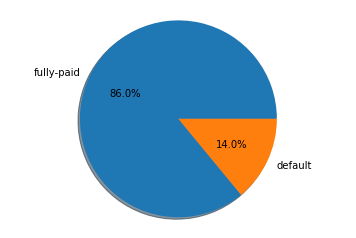

In [46]:
import matplotlib.pyplot as plt

# Plotting pie chart of % of loan status 
sums = data.groupby('loan_status' ).count()[['loan_amnt']]/len(data.index) * 100

labels = ['fully-paid' ,'default']
fig1, ax1 = plt.subplots()
ax1.pie(sums, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


# 14% of loans were defaulted 

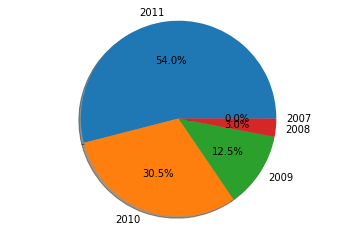

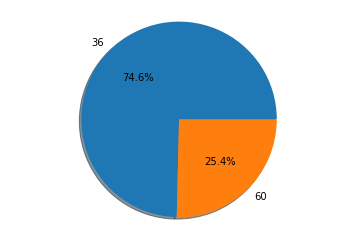

36    26136
60     8886
Name: term, dtype: int64

In [47]:


def pie_chart(a , r):
    labels = data.issued_year.unique()
    fig1, ax1 = plt.subplots()
    labels = sorted(data[a].unique() , reverse=r )
    ax1.pie(data[a].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()
    

    
pie_chart('issued_year' , True)

pie_chart('term' , False)

data.term.value_counts()

### Observations
#### 75 % of the loans given were for the term of 36 months counting up to 26136
#### 2011 has highest number of loans counting up to 16000 and defaults counting up to 3800
#### 14 % of the loans were defaulted counting up to 4909

In [48]:

def dist_plot(column):
    f,p = plt.subplots(nrows =1,ncols=2,figsize=(25,10))
    p[0].set_title("Distribution Plot of " + column)
    sns.distplot(data[column] ,ax=p[0] )
    p[1].set_title("box Plot of " + column)
    sns.boxplot(data =data, x=data[column] ,ax=p[1],orient='v')
    



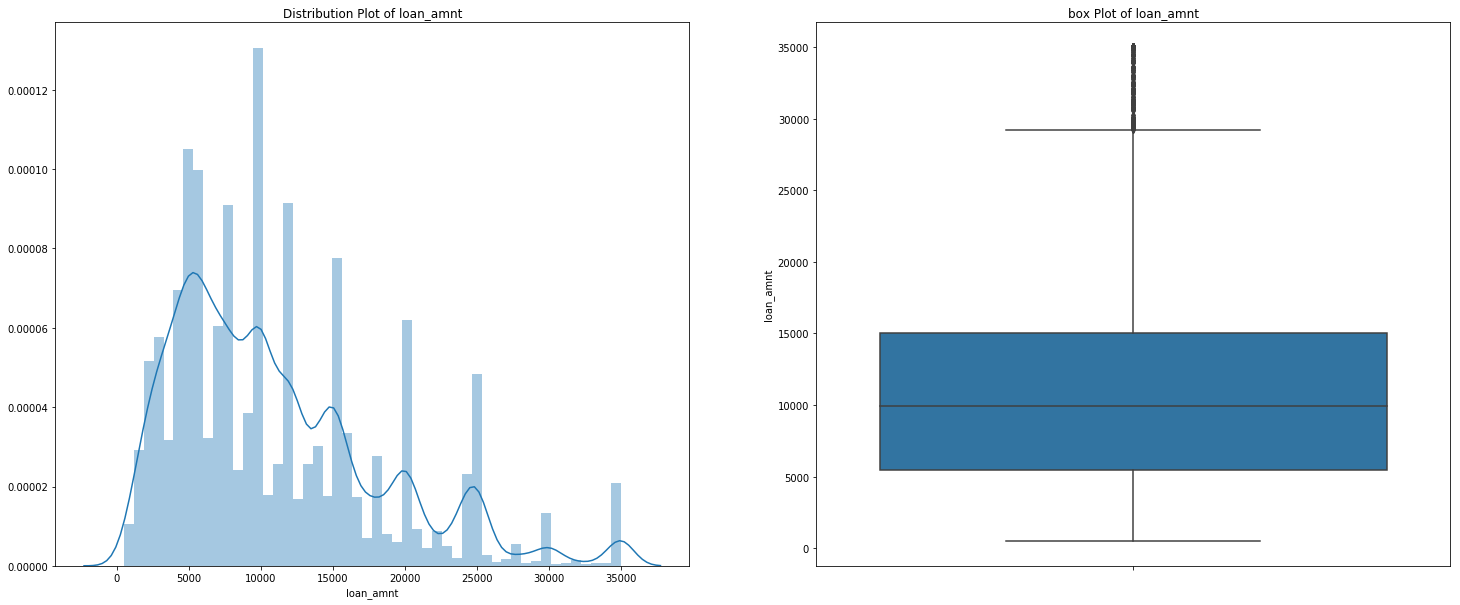

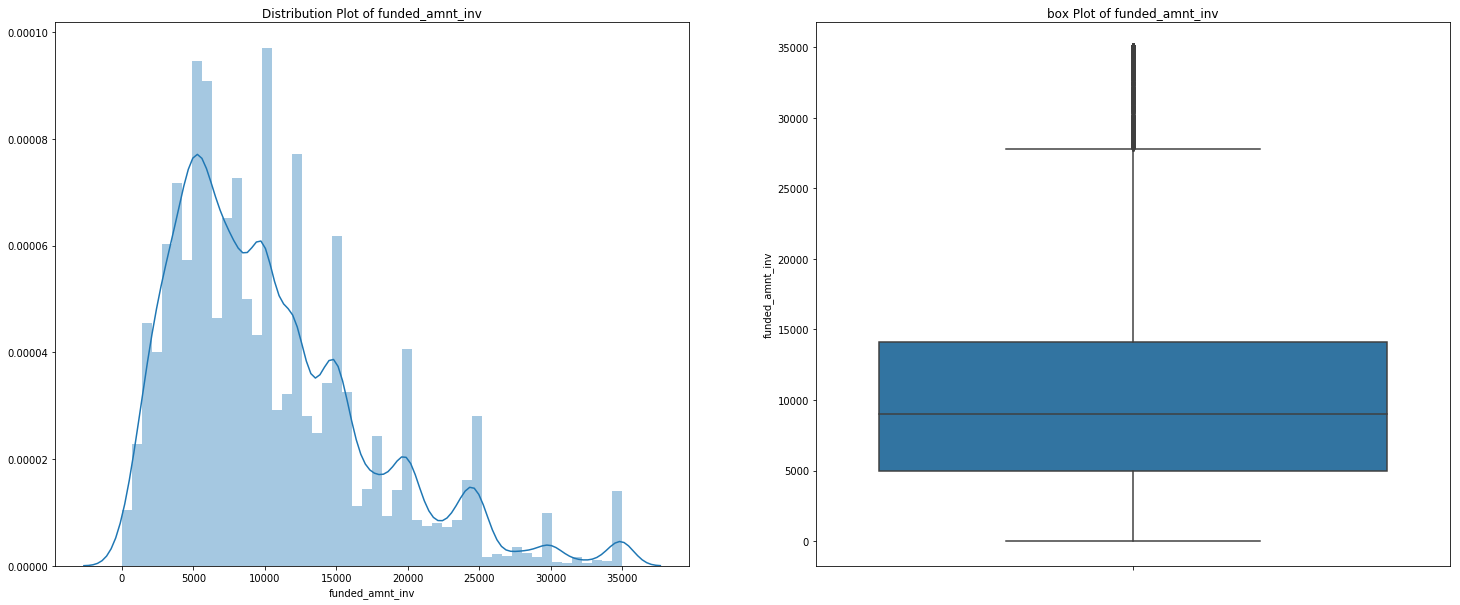

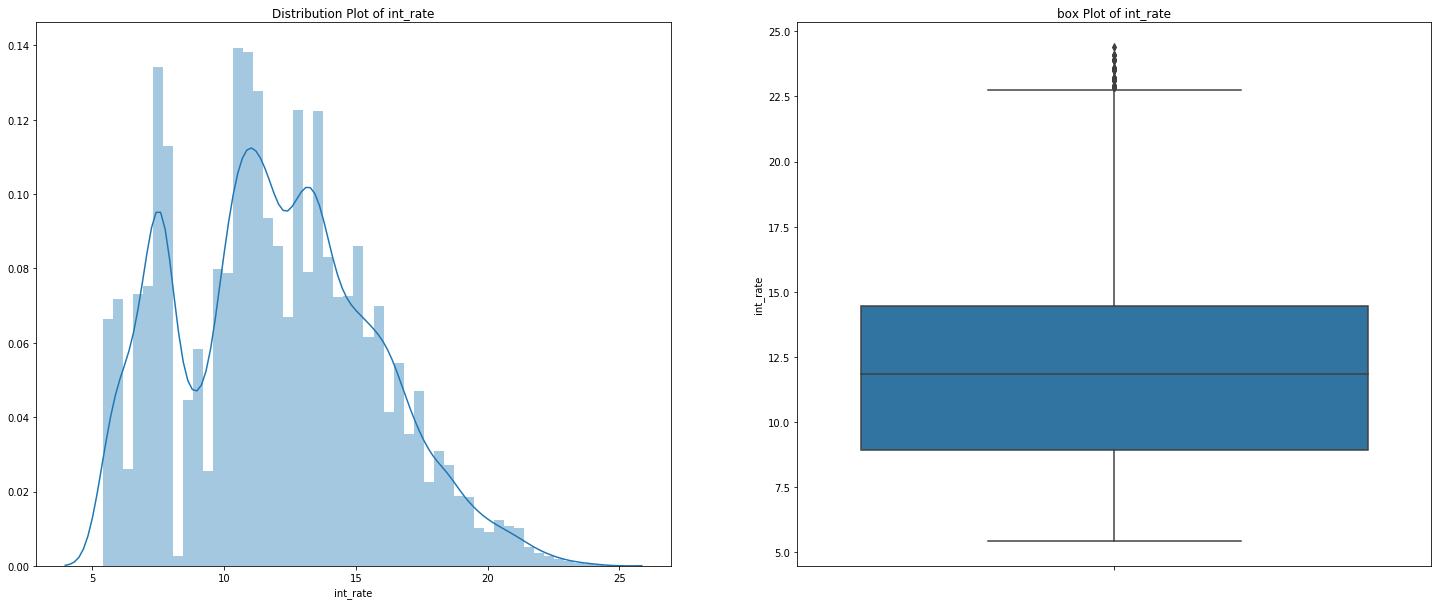

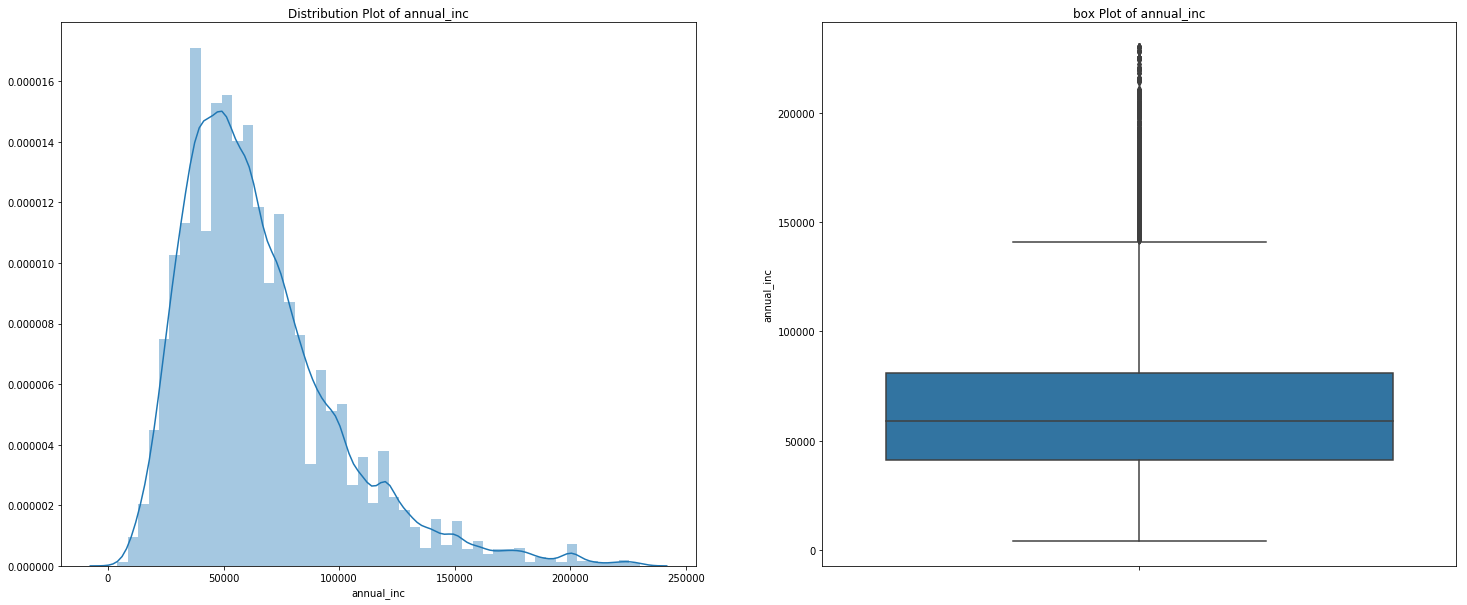

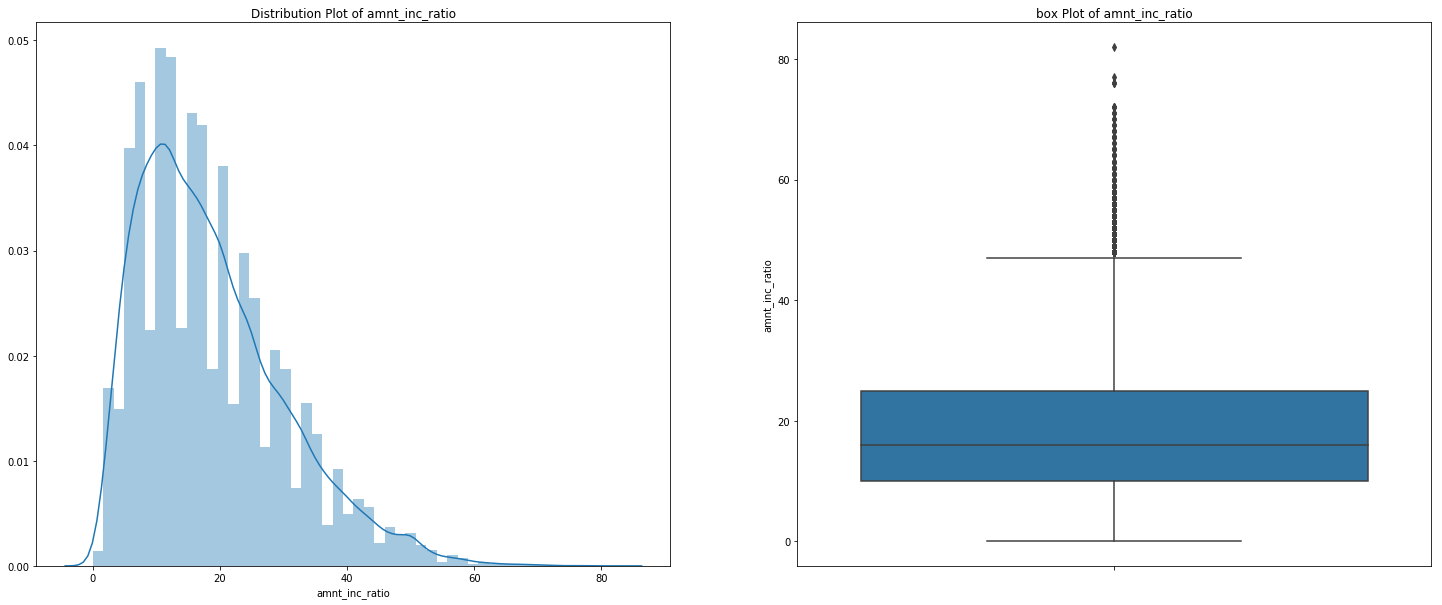

In [49]:

dist_plot('loan_amnt')
dist_plot('funded_amnt_inv')
dist_plot('int_rate')

dist_plot('annual_inc')
dist_plot('amnt_inc_ratio')

# observations are below plots

### Observations :
#### Most loan amount and funded_amnt_inv are distributed between 5000 - 12000 
#### Most int_rate are distributed between 11% - 14%
#### Most annual_inc is distributed between 50000 - 90000 , and we can observe there are values with high annual_inc above 75th quartile
#### loan amount - income ratio is high at 10 - 20 

In [50]:
#plt.subplots(nrows =1,ncols=1,figsize=(20,8))
#sns.barplot(x = data.purpose , y=data.loc[data.loan_status == 1].count()/len(data.index)*100 ,data=data)

data.groupby(['loan_status','purpose'])['purpose'].count().unstack()/data.groupby('purpose')['purpose'].count()

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
0,0.89,0.90,0.85,0.84,0.89,0.84,0.90,0.85,0.85,0.84,0.82,0.73,0.85,0.90
1,0.11,0.10,0.15,0.16,0.11,0.16,0.10,0.15,0.15,0.16,0.18,0.27,0.15,0.10


In [51]:
def bar_plot(column):
    plt.subplots(nrows =1,ncols=1,figsize=(20,8))
    sns.barplot(x = column , y='loan_status' ,data=data)
    

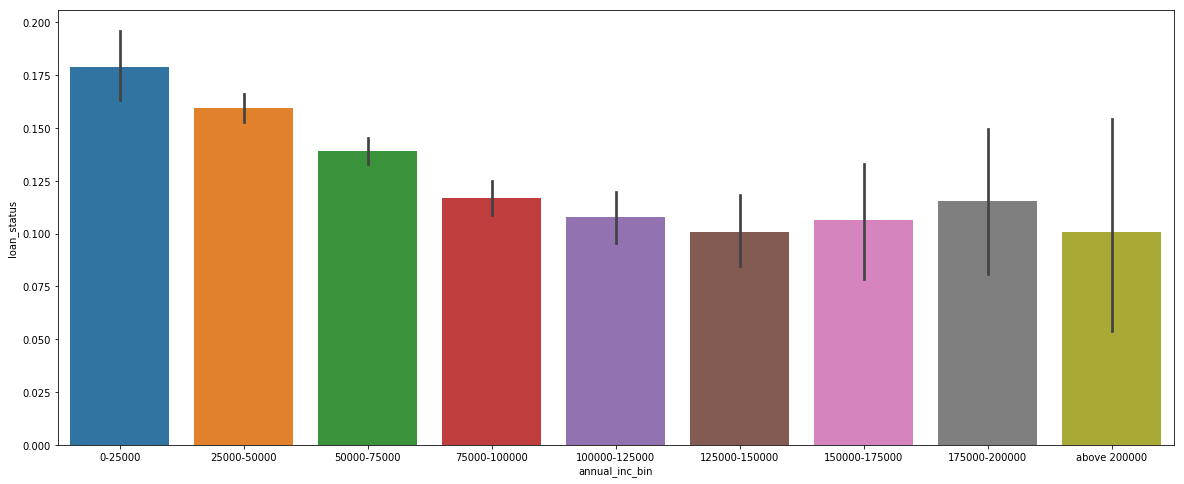

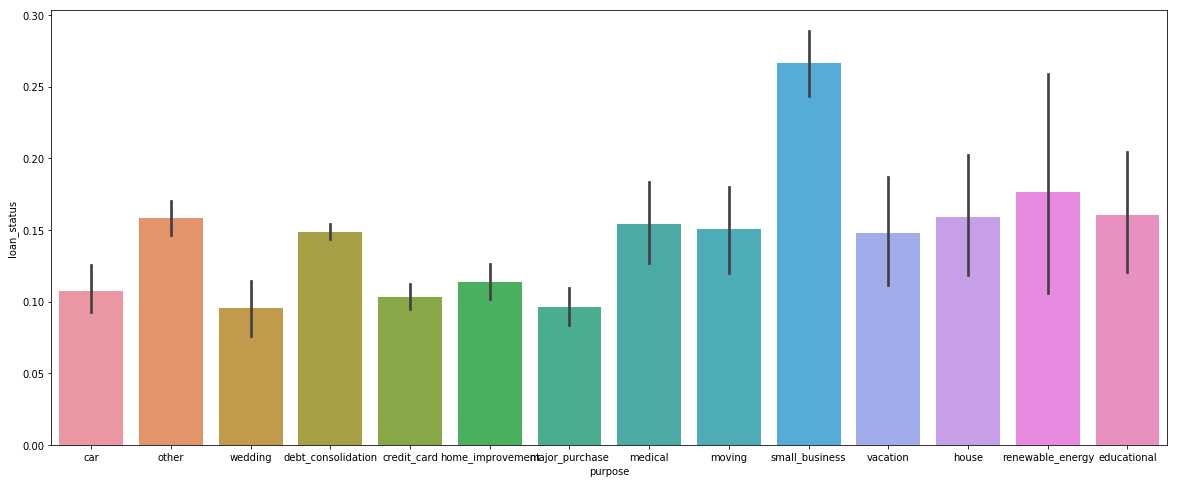

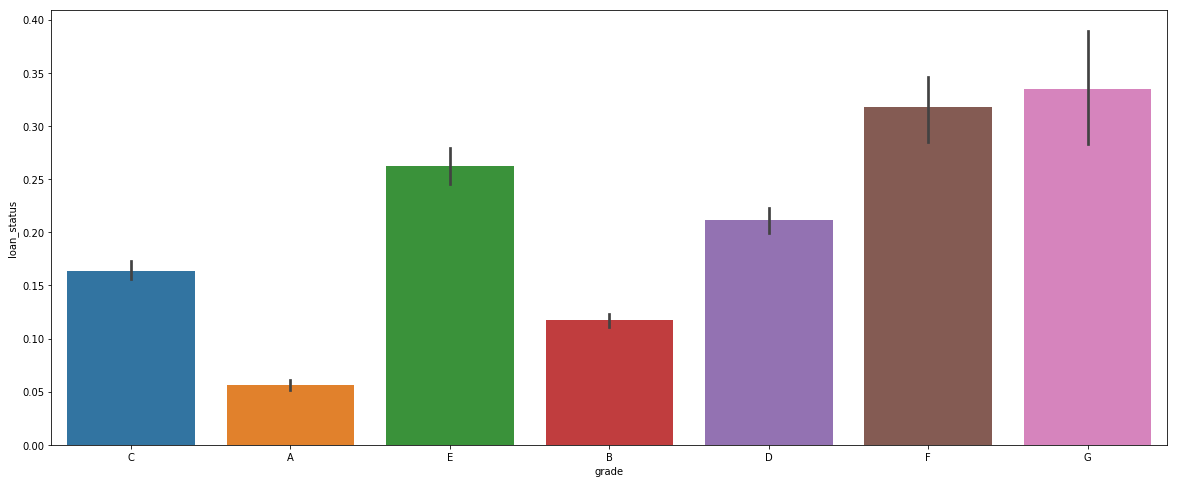

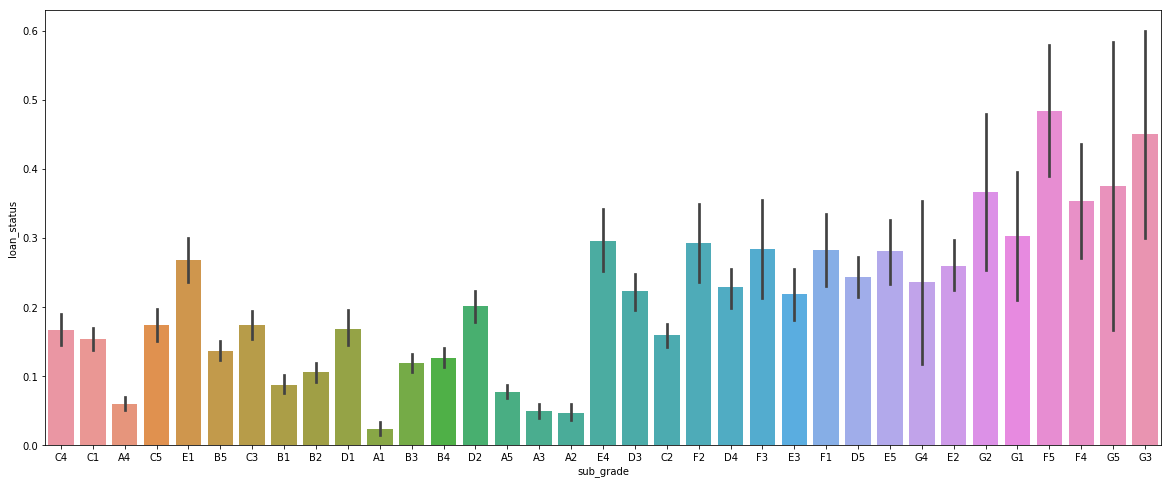

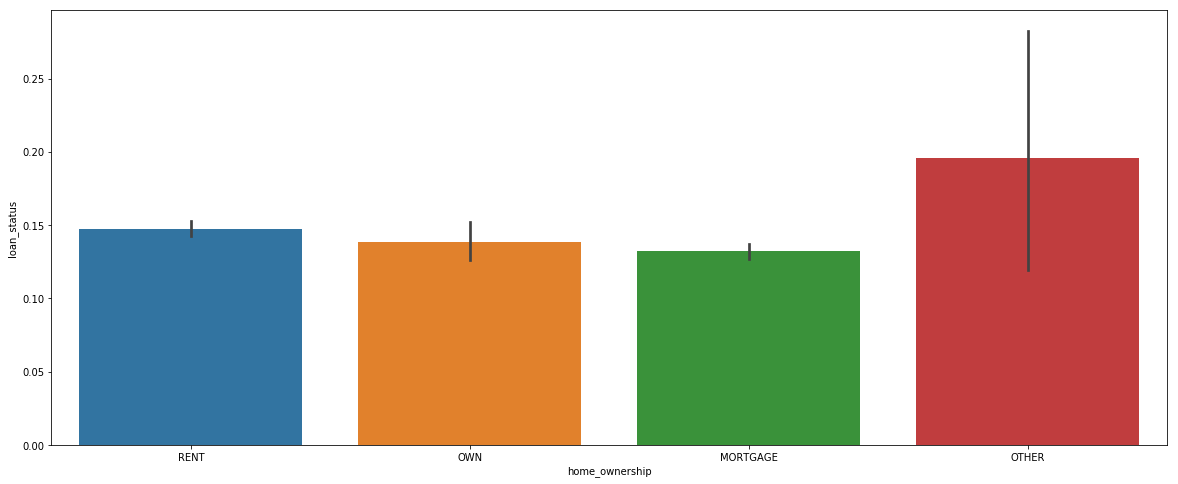

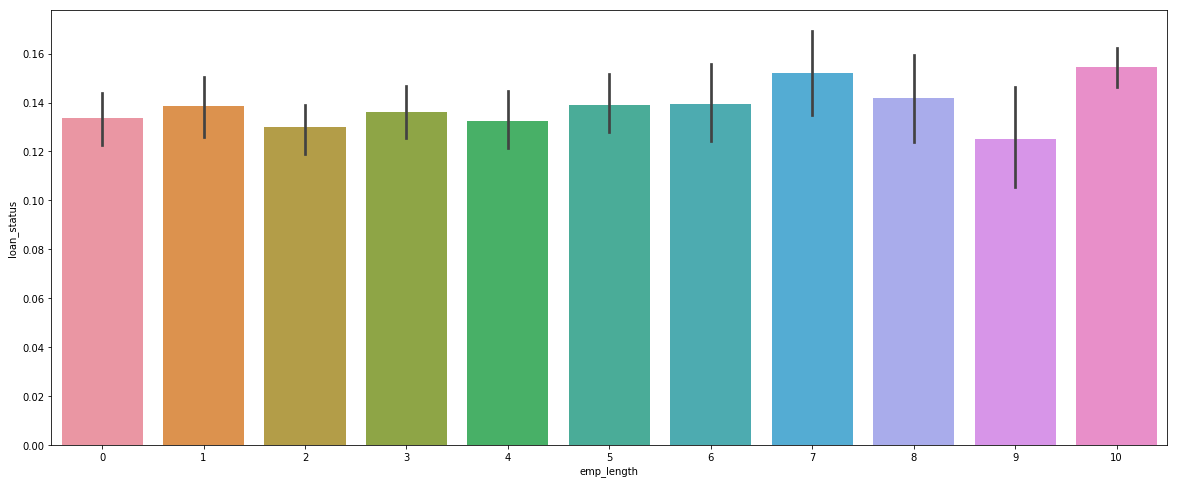

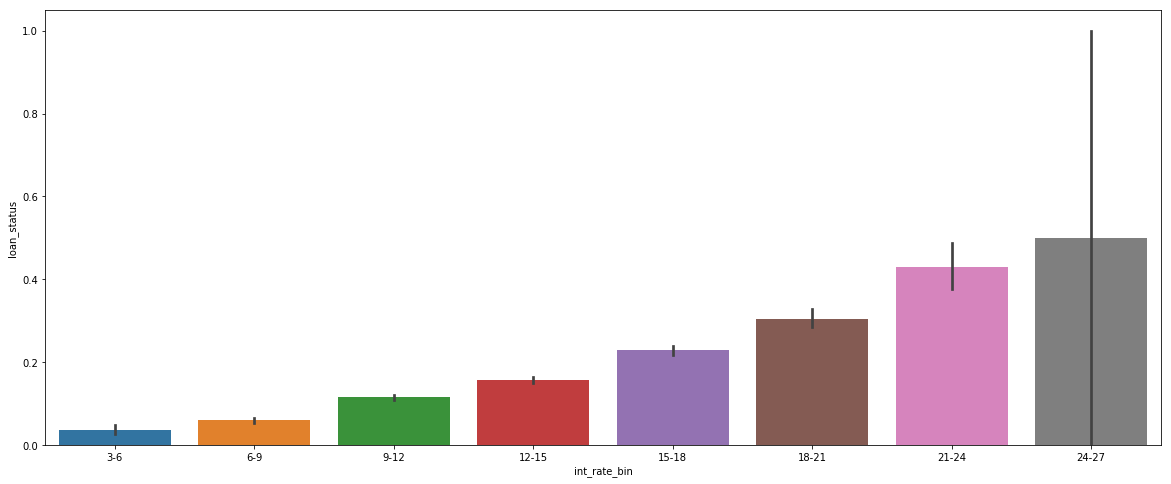

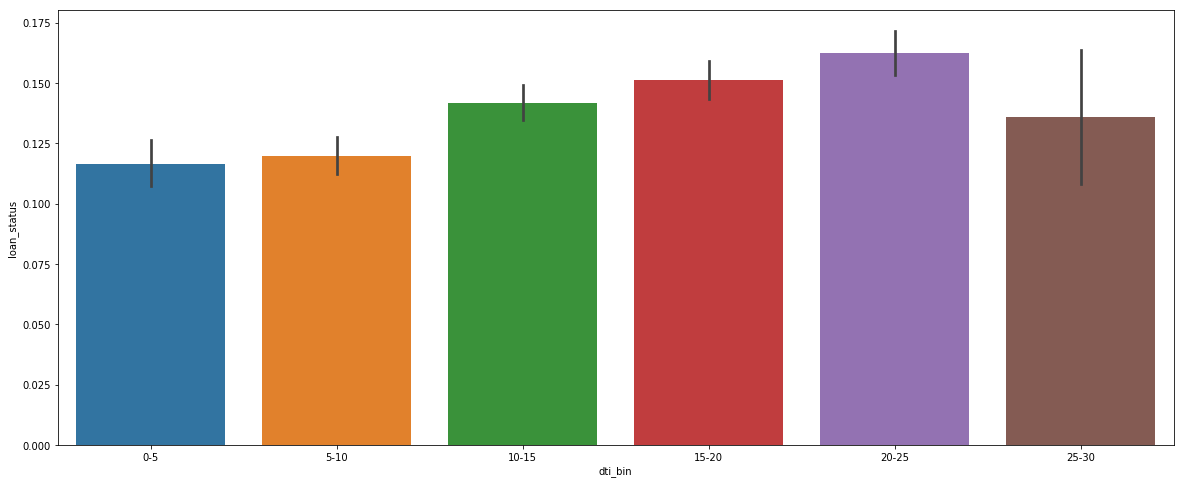

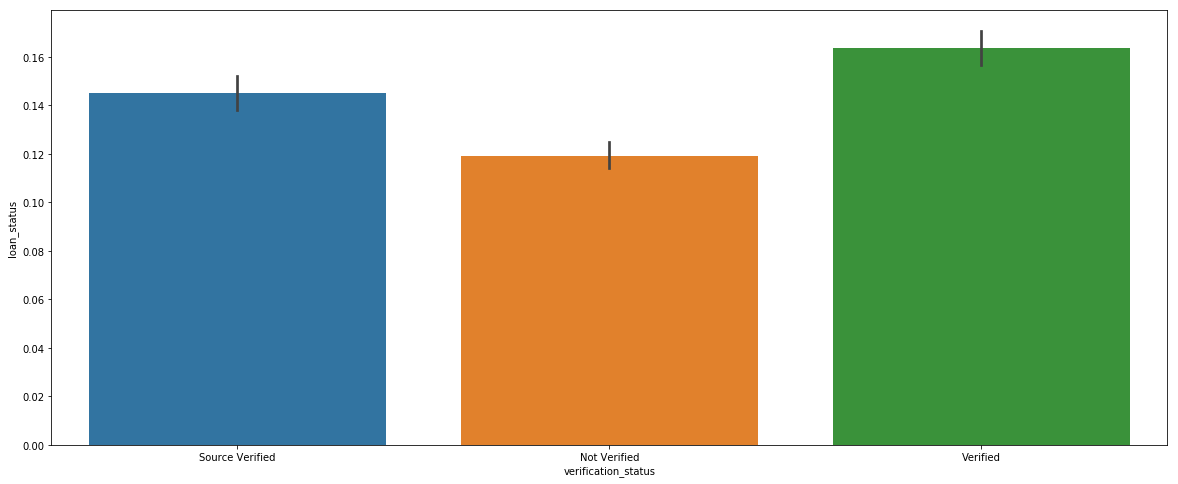

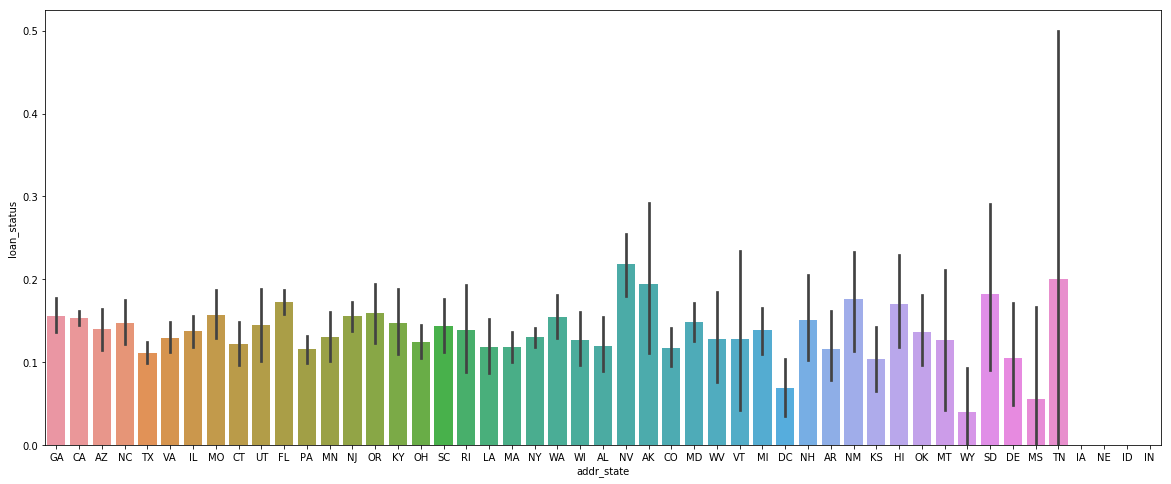

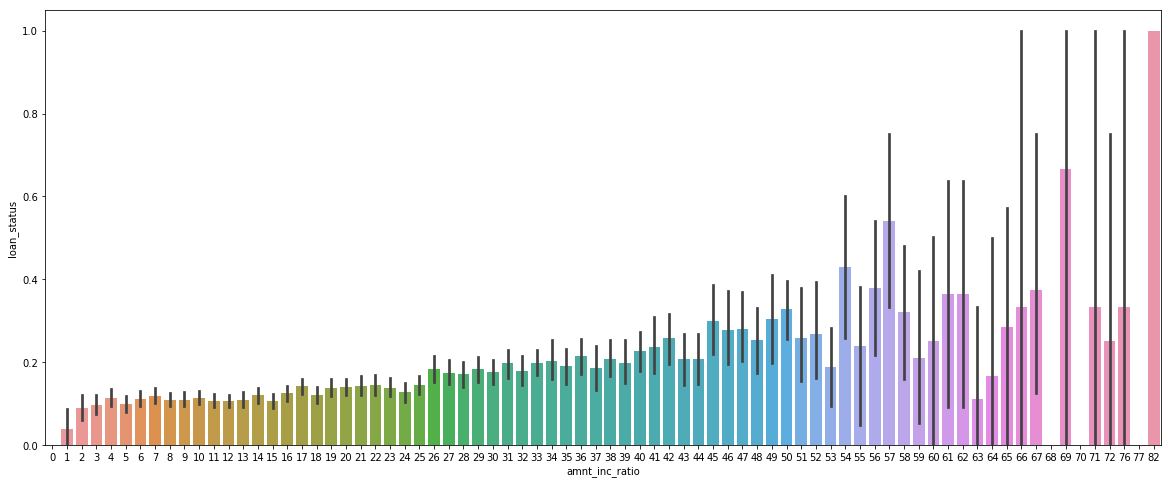

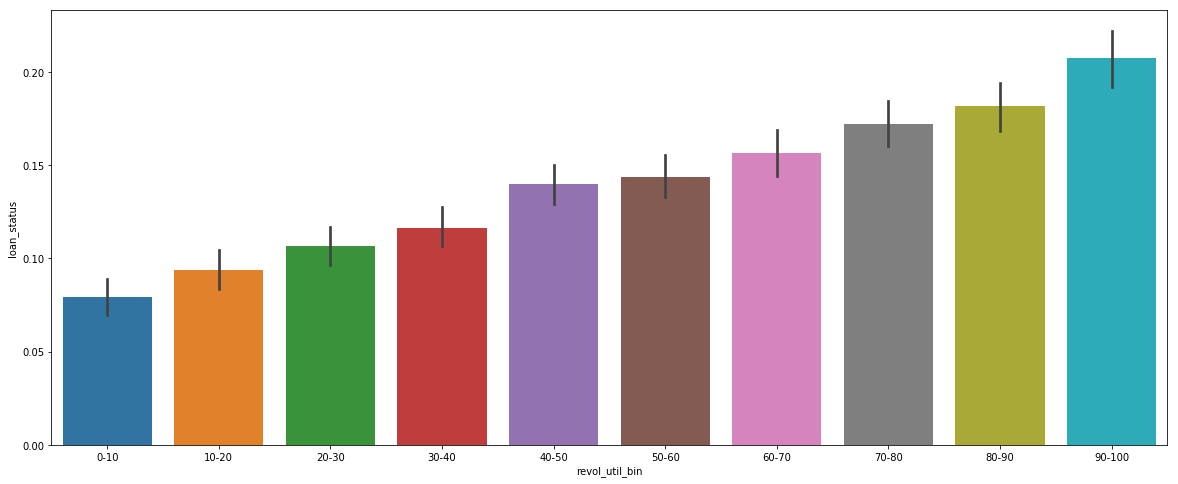

In [52]:
bar_plot('annual_inc_bin')
bar_plot('purpose')

# Grade and subgrade 
bar_plot('grade')
bar_plot('sub_grade')
bar_plot('home_ownership')

bar_plot('emp_length')

bar_plot('int_rate_bin')
bar_plot('dti_bin')

bar_plot('verification_status')

bar_plot('addr_state')
bar_plot('amnt_inc_ratio')
bar_plot('revol_util_bin')

# observations are below plots

### Observation :
#### As expected A grade has lowest default rate and G with highest 
#### From sub-grades F5 has highest default followed by G3
#### From the purpose barplot ,  small business has highest loan default with 27 % followed by renuable energy 
#### people with emp_length (experience) greater than 10 years tend to default the highest
#### Higher the int_rate higher the defaulters 
#### People with less annual income have high loan default  
#### verified loan applicants tend to default more 
#### Higher DTI values higher the chance of loan default 
#### High ratio between loan amount and annual income - high loan default  
#### applicants with house ownership - other have high loan default 
#### If revol_util  >   70%  -  high loan default 

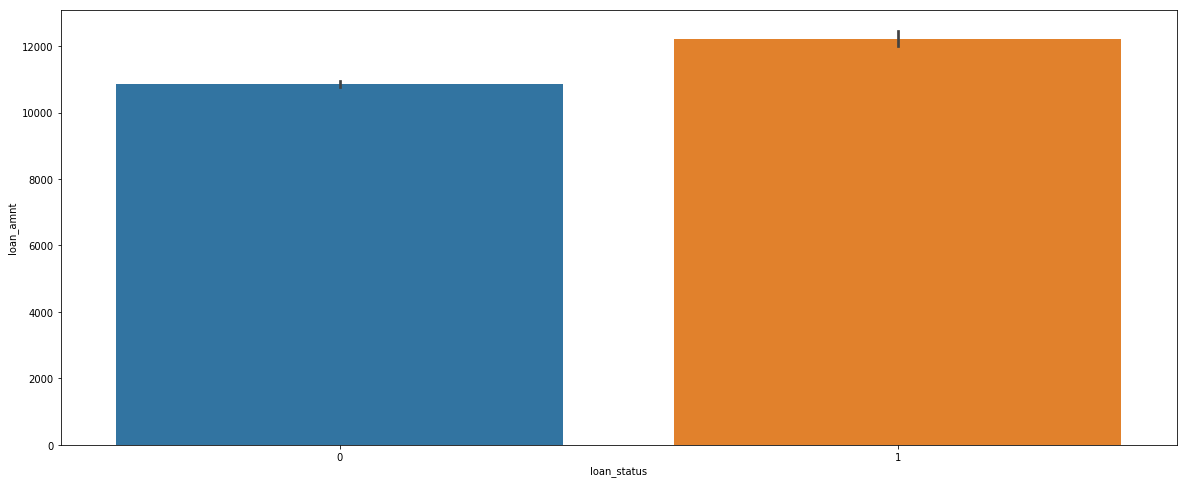

In [53]:
plt.subplots(nrows =1,ncols=1,figsize=(20,8))
sns.barplot(x = 'loan_status' , y='loan_amnt' ,data=data)

#### Loan applications with high loan amount have high default 

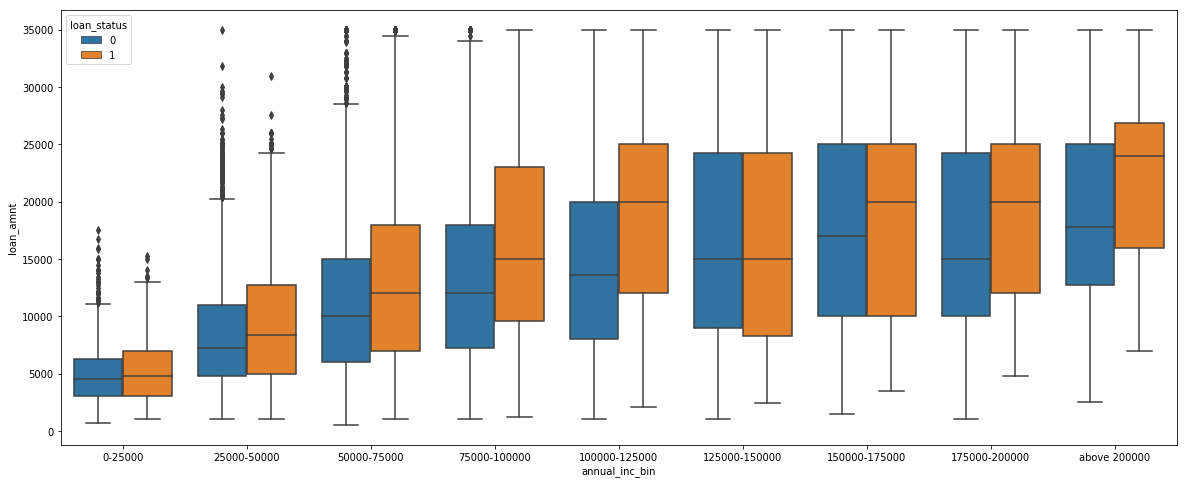

In [54]:
plt.subplots(nrows =1,ncols=1,figsize=(20,8))
sns.boxplot(x = 'annual_inc_bin' , y='loan_amnt' ,hue = "loan_status"  ,data=data)

In [55]:
# function for count plot 
def count_plot(c):
    plt.subplots(nrows =1,ncols=1,figsize=(20,8))
    sns.countplot(x=c,hue = "loan_status" ,data=data)
    plt.subplots(nrows =1,ncols=1,figsize=(20,8))
    sns.countplot(x=c ,data=data)


 

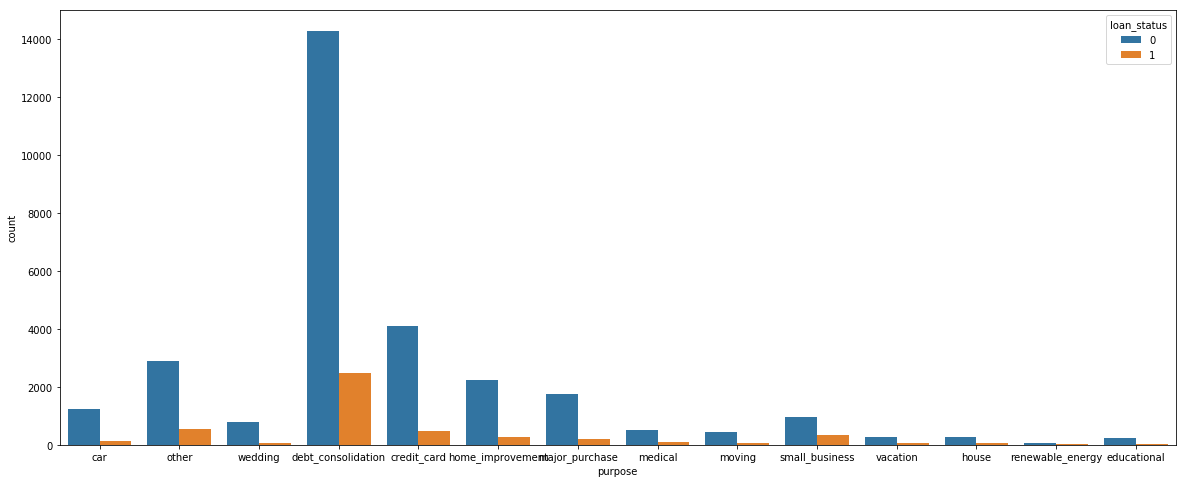

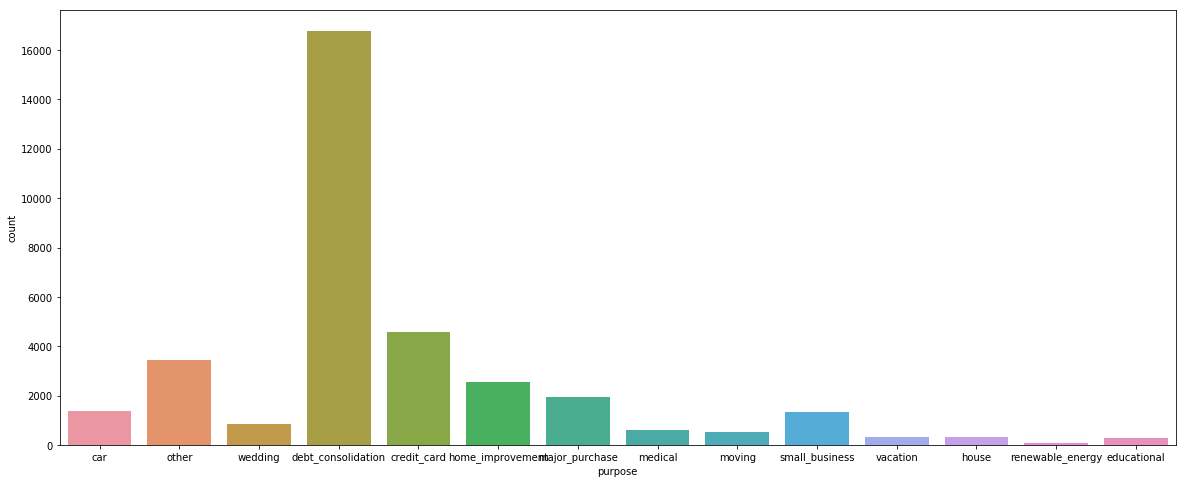

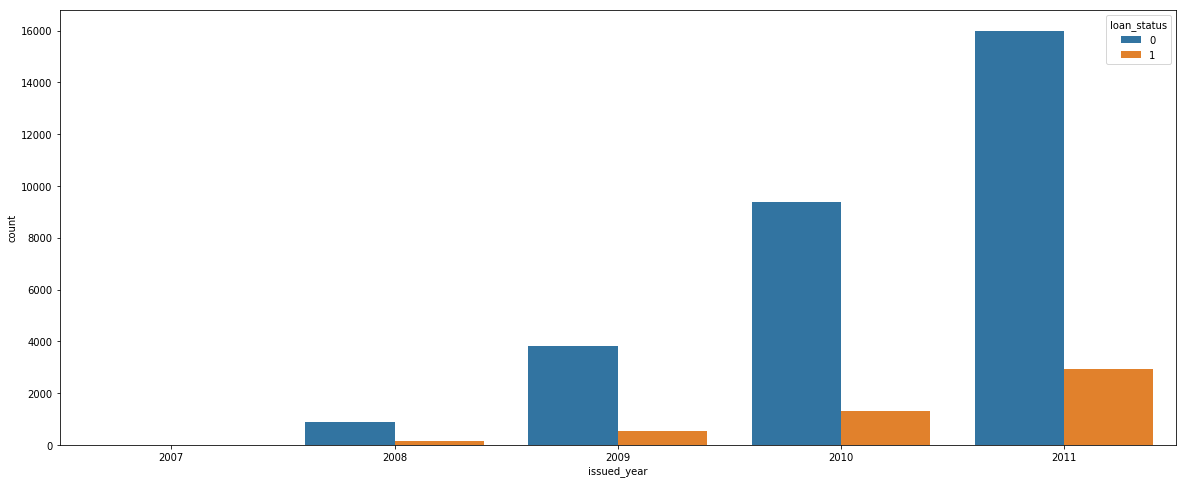

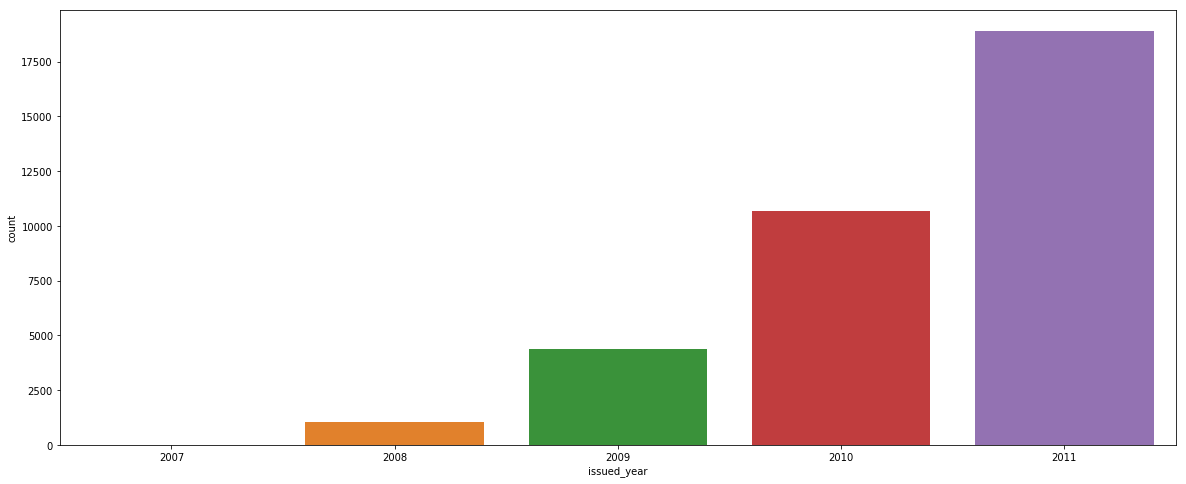

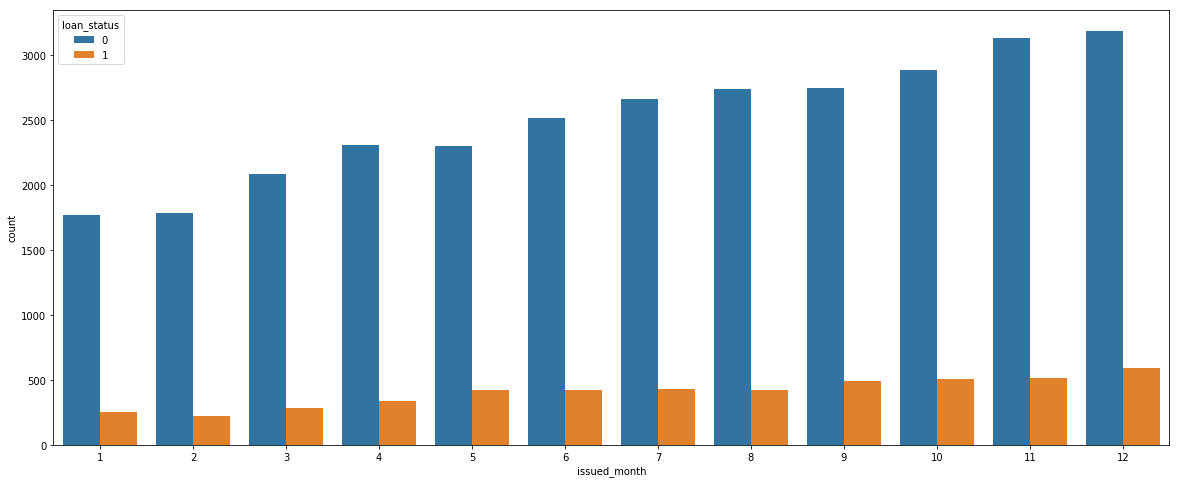

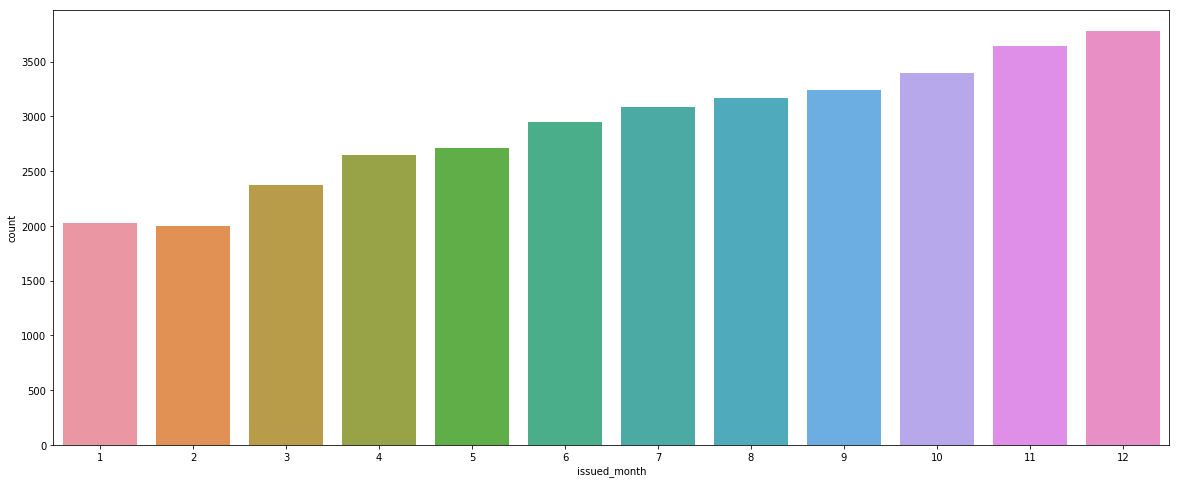

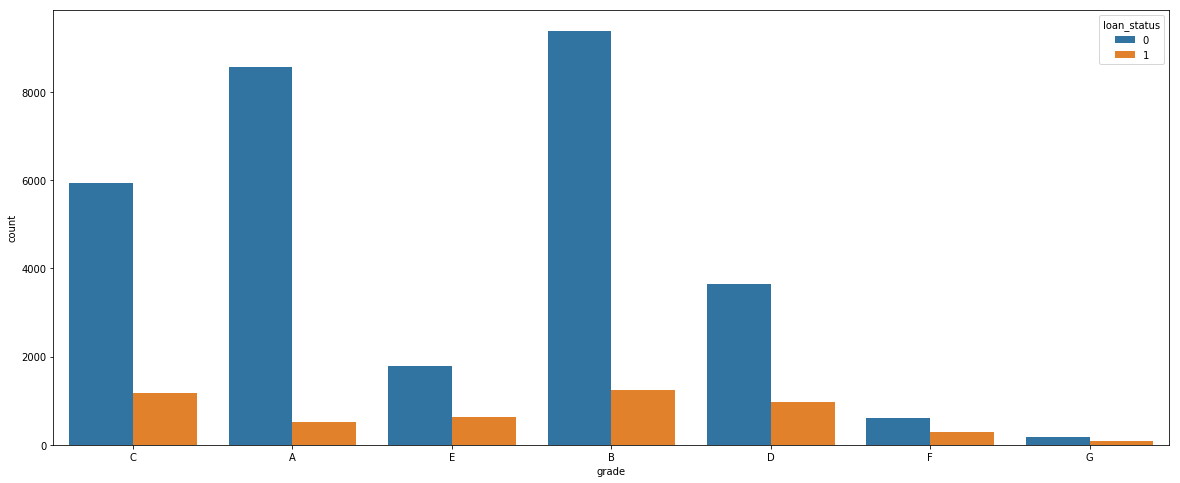

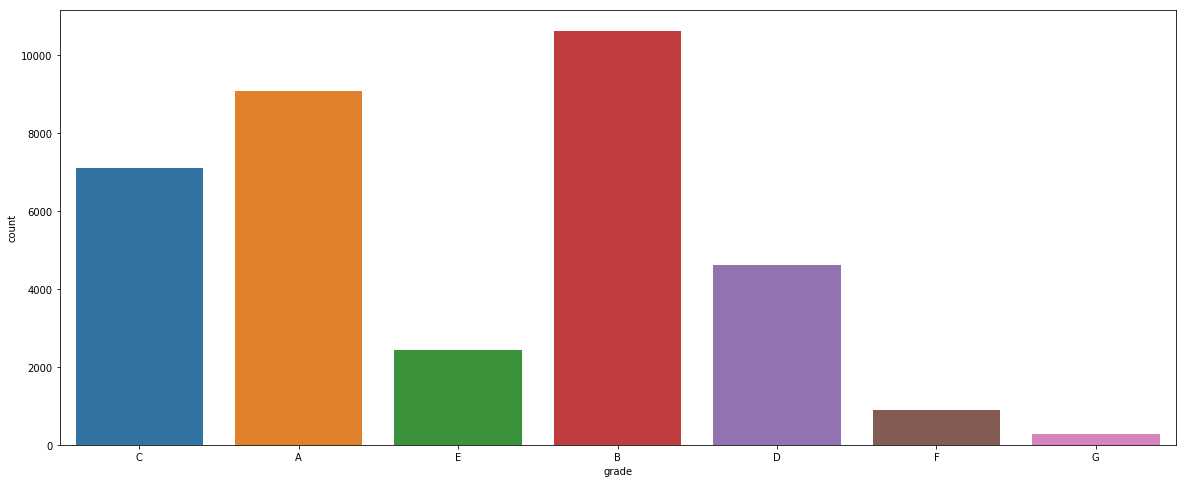

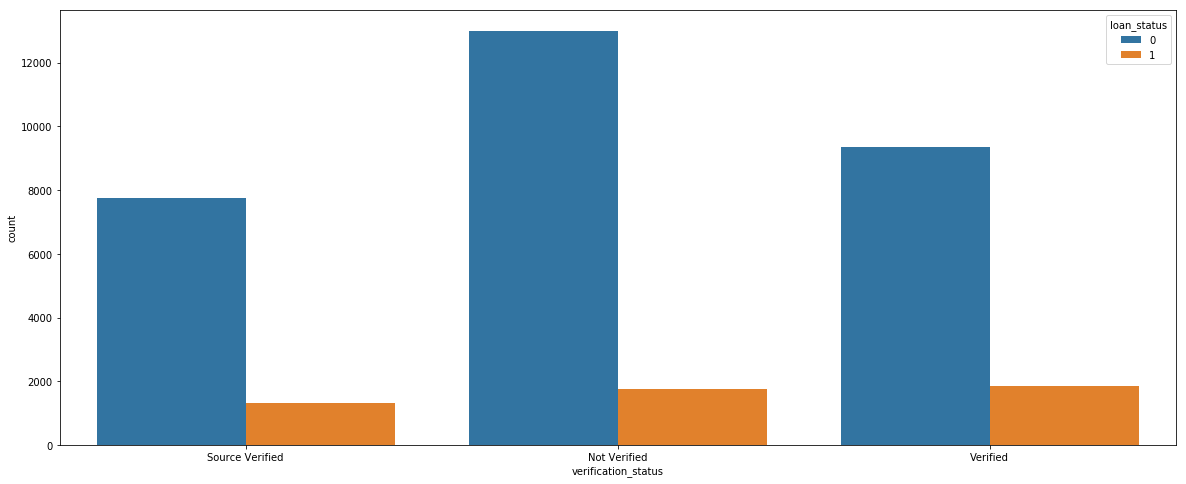

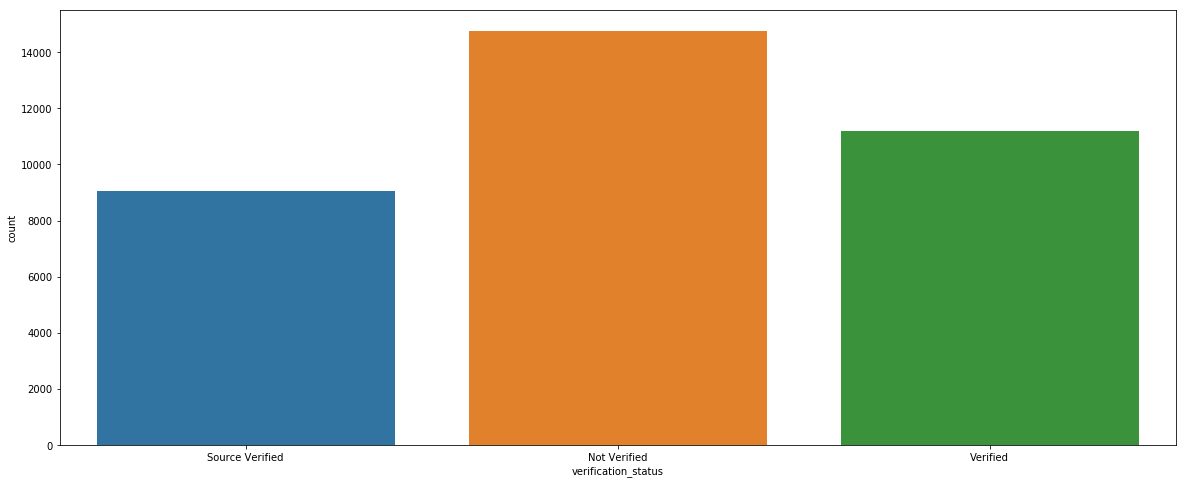

In [56]:
count_plot('purpose')
count_plot('issued_year')
count_plot('issued_month')
count_plot('grade')
count_plot('verification_status')

# observations are below plots

### Observations:
#### Most of the loans were taken for debt_consolidation
#### Theres a huge spike in number of loans in 2011 
#### Theres an increase in number of loans at year end 
#### Most of the loans are graded B or A. 
#### There are more than 10000 loans under B grade 
#### There are more than 14000 non verified loans

In [57]:
#f,p=plt.subplots(nrows =2,ncols=1,figsize=(20,8))
#sns.barplot(data['pub_rec'], data["loan_status"] , ax=p[0])
#sns.barplot(data['pub_rec_bankruptcies'], data["loan_status"] , ax=p[1])


## BIVARIATE 

In [58]:

#plt.subplots(nrows =1,ncols=1,figsize=(20,8))
#sns.boxplot(y="loan_amnt", x="annual_inc_bin", hue = "loan_status" ,data=data)


In [59]:
def box_bi(x,y,hue):
    plt.subplots(nrows =1,ncols=1,figsize=(20,8))
    plt.title(x +' vs '+y)
    sns.boxplot(data =data, x=x, y=y, hue =hue)


def bar_bi(x,y,hue):
    plt.subplots(nrows =1,ncols=1,figsize=(20,8))
    plt.title(x +' vs '+y)
    if hue:
        sns.barplot(data =data, x=x, y=y, hue =hue)
    else:
        sns.barplot(data =data, x=x, y=y)
    
    

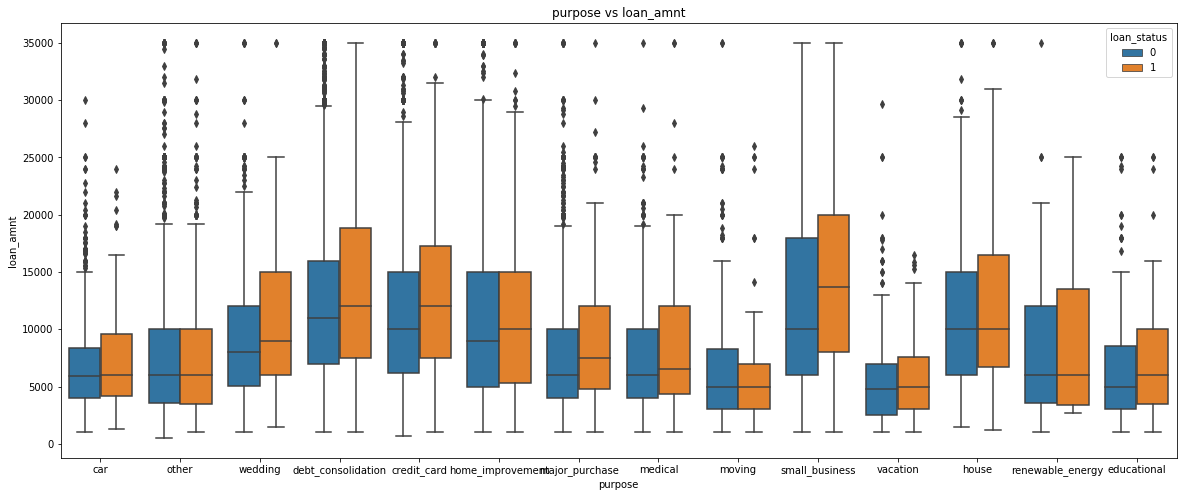

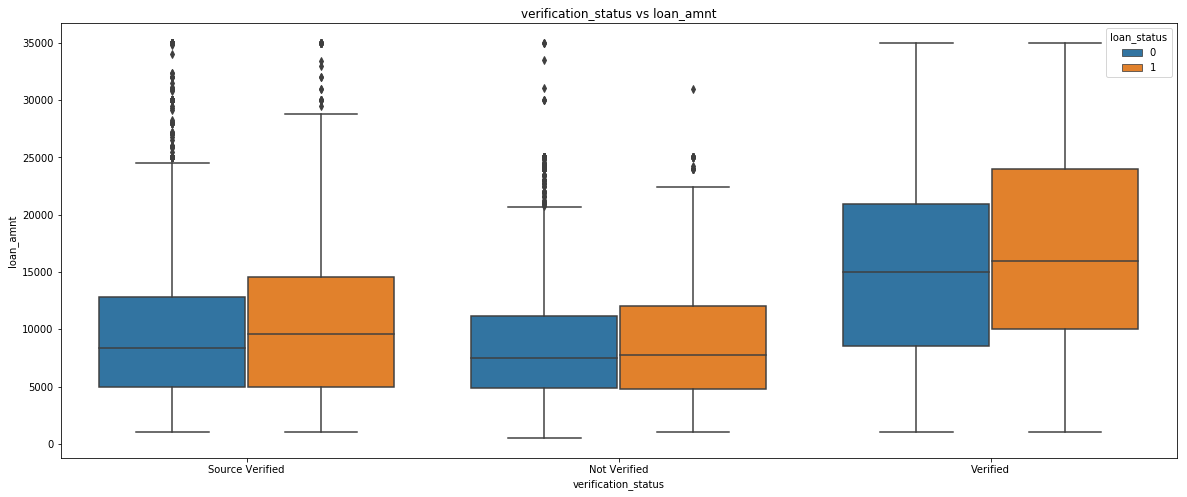

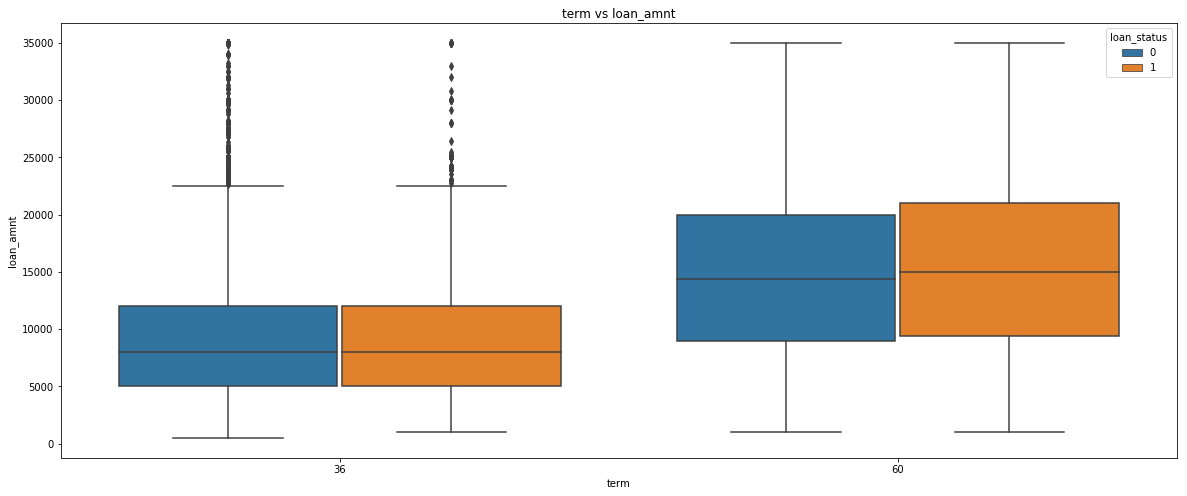

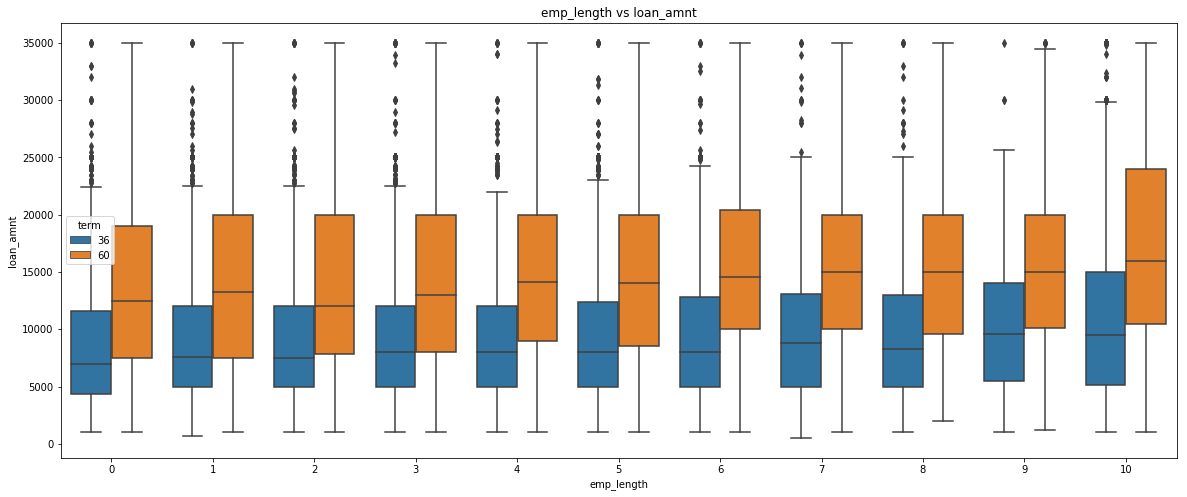

In [60]:
box_bi('purpose' ,'loan_amnt','loan_status' )
box_bi('verification_status' ,'loan_amnt','loan_status' )
box_bi('term' ,'loan_amnt','loan_status' )
box_bi('emp_length' ,'loan_amnt','term' )




### Observations
#### verification_status  vs  loan_amnt - source verified loans tend to default more because these are the loans with high loan amounts, loans with high amounts are definitely verified and high loan amounts have high default rate  
#### Loan amounts are high with 60 months term and they have risk of default



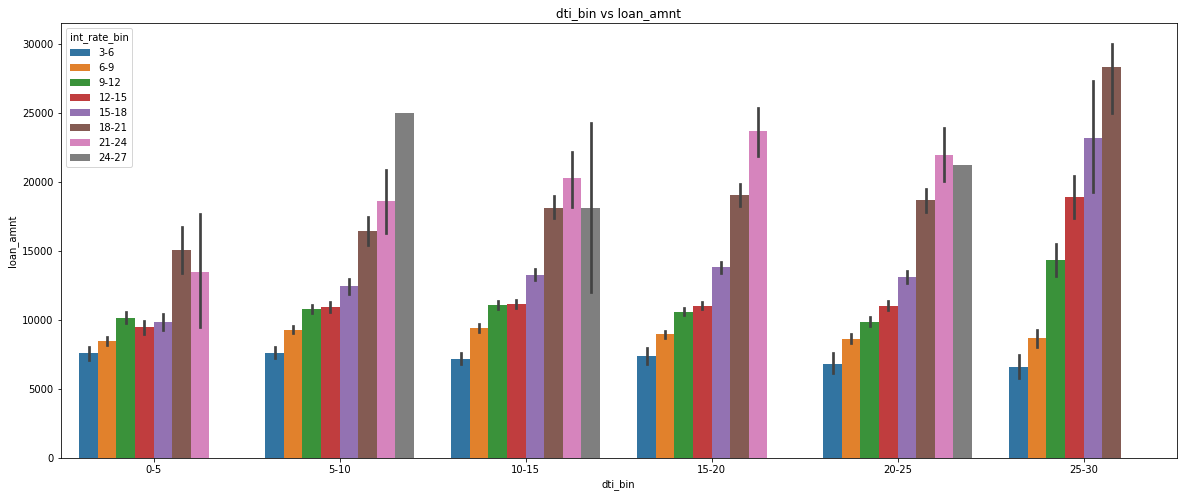

In [61]:
bar_bi('dti_bin' ,'loan_amnt' ,'int_rate_bin')


#### dti_bin vs loan_amnt 
#### We can observe that in DTI segment - 20-25 , intrest rates are low. So it would be a safe choice to increase intrest rates for high DTI loans as they are prone to loan defaults

#### Reason : from previous plot we know loan applications with high loan amount have high default  and DTI > 20 ,   loan default is high


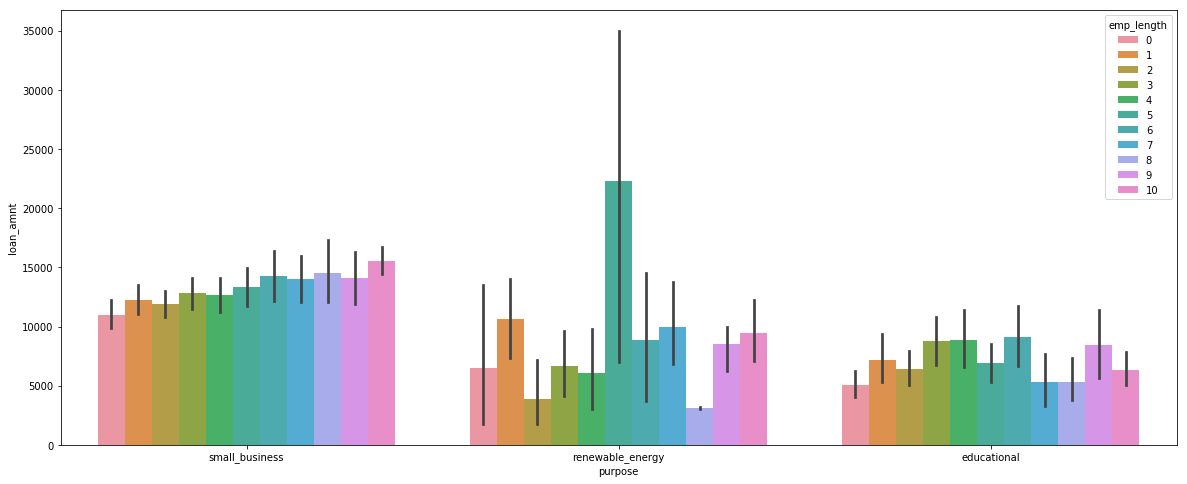

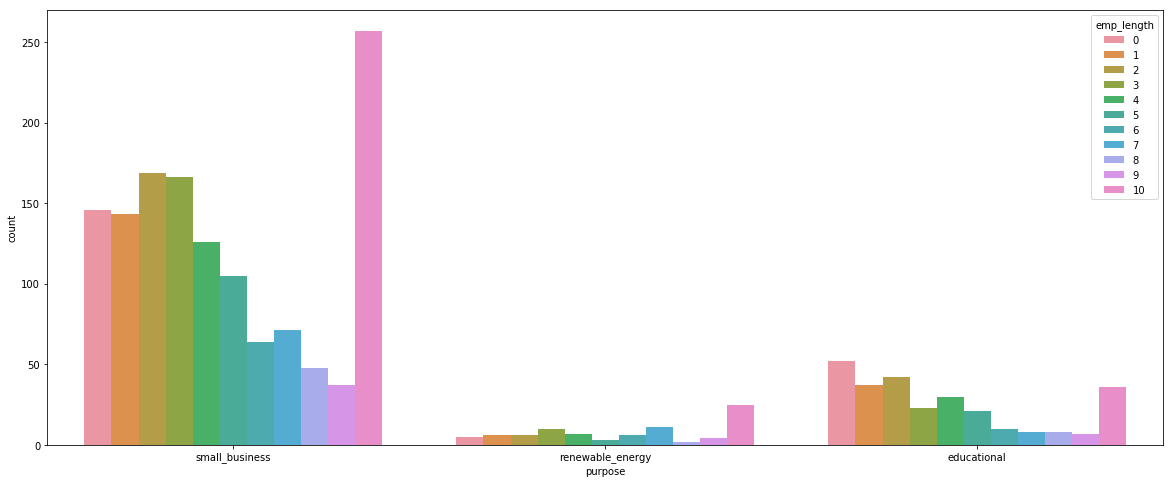

In [62]:
#bar_bi('purpose' ,'loan_amnt','emp_length' )

#lets take only high loan default purpose columns 

plt.subplots(nrows =1,ncols=1,figsize=(20,8))
sns.barplot(data =data, x=data.purpose[data['purpose'].isin(["small_business","renewable_energy","educational"])] , y='loan_amnt', hue ='emp_length')

plt.subplots(nrows =1,ncols=1,figsize=(20,8))
sns.countplot(x= data.purpose[data['purpose'].isin(["small_business","renewable_energy","educational"])] ,hue = "emp_length" ,data=data)


#### Observations:
#### We already know from previous univariate analysis that loan applications with purpose - small business and renewable_energy have high loan default 
#### From the above plot we can see that values with experience > 5 are taking huge amount of loan amount , high loan amount have high default
#### So loan applicants with experience > 5 and purpose with small business or renewable_energy take huge amount of loan and they are highly prone to loan default 

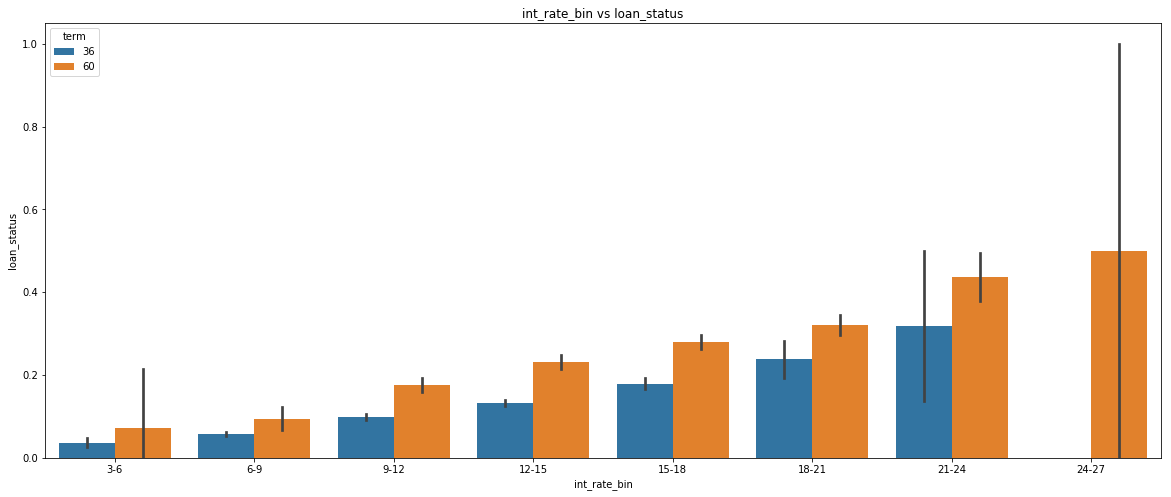

In [63]:
bar_bi( 'int_rate_bin' ,'loan_status', 'term' )


# If Interest rate is < 6% and for 36 months term - low risk


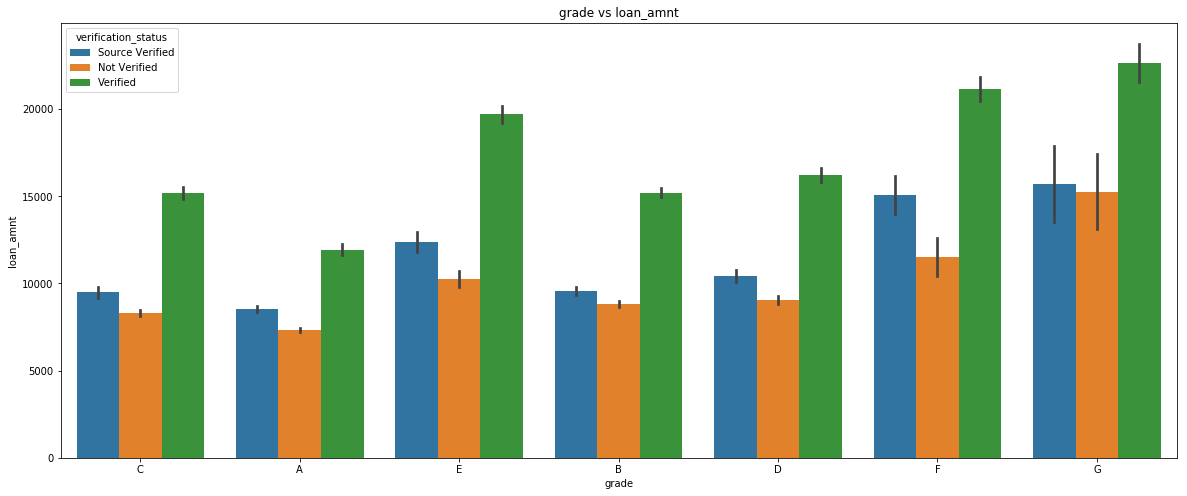

In [64]:
bar_bi( 'grade','loan_amnt','verification_status' )

# Grade G are getting huge no.of lones 

In [65]:
data_correlation = data[['loan_amnt','funded_amnt_inv', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']].corr()

data_correlation

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.00,0.95,0.30,0.93,0.15,0.41,0.07,-0.04,0.01,0.17,-0.04,0.32,0.07,0.25,0.48,-0.03
funded_amnt_inv,0.95,1.00,0.29,0.92,0.15,0.39,0.08,-0.04,-0.00,0.16,-0.05,0.29,0.07,0.24,0.47,-0.04
int_rate,0.30,0.29,1.00,0.27,0.00,0.06,0.11,0.16,0.13,0.01,0.10,0.09,0.47,-0.05,0.17,0.08
installment,0.93,0.92,0.27,1.00,0.12,0.40,0.06,-0.03,0.01,0.17,-0.04,0.31,0.10,0.22,0.41,-0.03
emp_length,0.15,0.15,0.00,0.12,1.00,0.17,0.05,0.01,0.01,0.10,0.07,0.16,0.01,0.21,0.08,0.06
annual_inc,0.41,0.39,0.06,0.40,0.17,1.00,-0.11,0.03,0.04,0.26,-0.01,0.42,0.04,0.38,0.22,-0.01
dti,0.07,0.08,0.11,0.06,0.05,-0.11,1.00,-0.03,0.01,0.29,-0.01,0.24,0.28,0.23,0.01,0.01
delinq_2yrs,-0.04,-0.04,0.16,-0.03,0.01,0.03,-0.03,1.00,0.01,0.01,0.01,-0.06,-0.04,0.07,-0.02,0.01
inq_last_6mths,0.01,-0.00,0.13,0.01,0.01,0.04,0.01,0.01,1.00,0.09,0.02,-0.02,-0.07,0.11,0.03,0.01
open_acc,0.17,0.16,0.01,0.17,0.10,0.26,0.29,0.01,0.09,1.00,0.01,0.28,-0.09,0.68,0.08,0.01


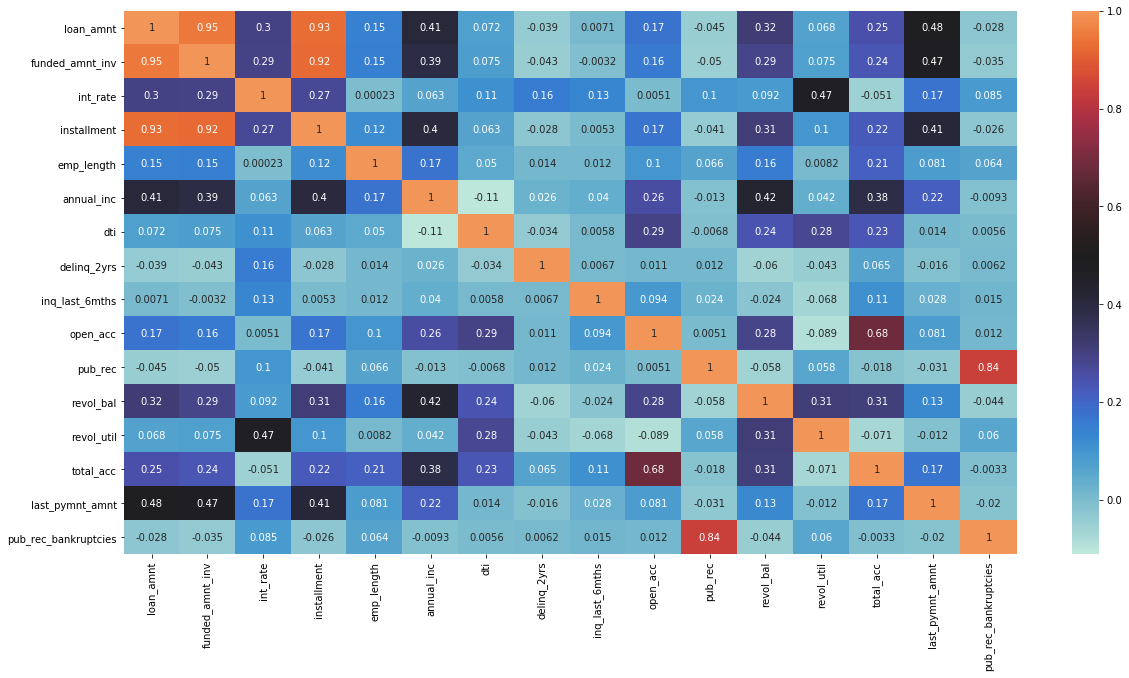

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(data_correlation, annot=True, center=0.5)


# loan_amt , funded_amnt_inv have high correlation 
# As expected annual_inc and dti have negitive correlation , if one increases other decreases 

# Top driving variables behind loan default :  Grade, Purpose, Interest rate, Annual income, Home ownership



